In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
import seaborn as sns

Text(0.5, 1.0, 'coorelation between the columns')

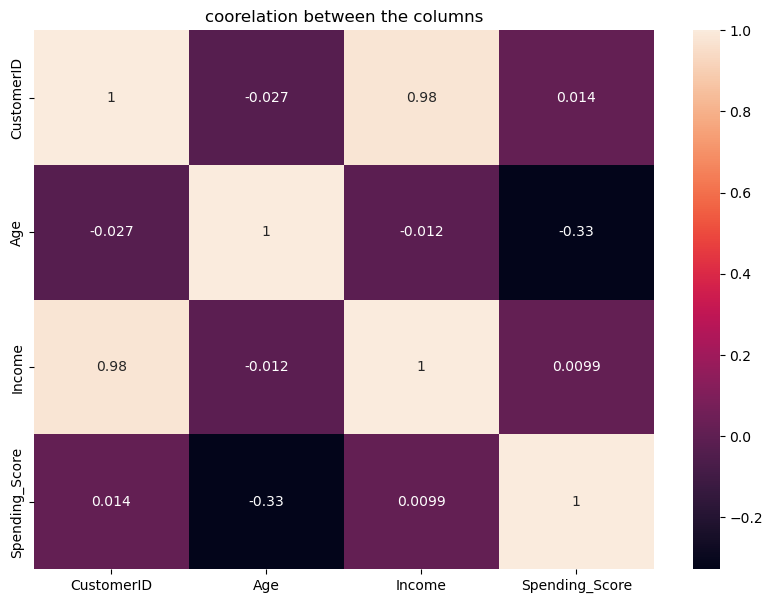

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("coorelation between the columns")


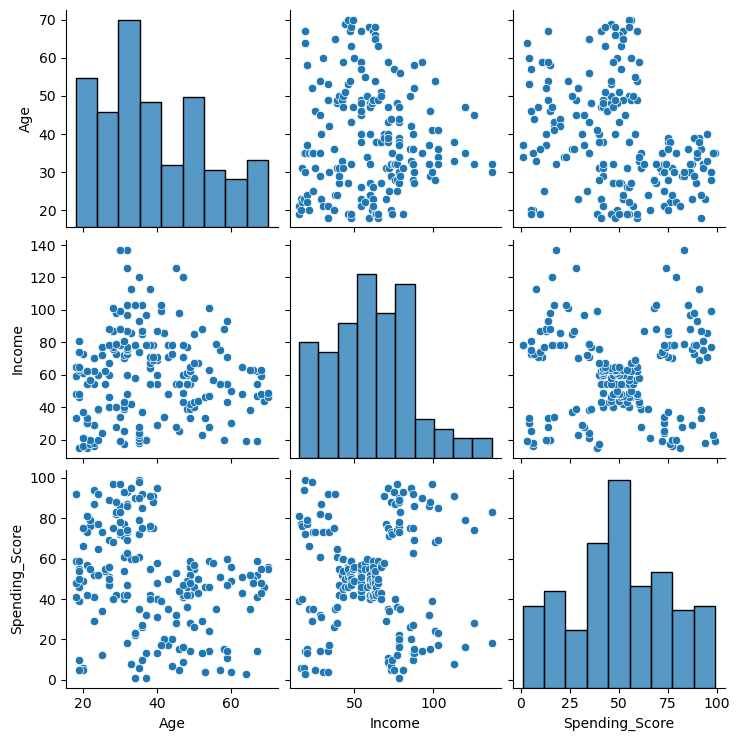

In [9]:
import seaborn as sns
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['Age','Income', 'Spending_Score']])

In [10]:
import sklearn.cluster as cluster

In [11]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [12]:
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154]])

In [13]:
kmeans.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 4, 2, 4, 0, 4, 0, 4,
       2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [14]:
df['Clusters'] = kmeans.labels_

In [15]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [16]:
df['Clusters'].value_counts()

2    81
4    39
0    35
3    23
1    22
Name: Clusters, dtype: int64

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

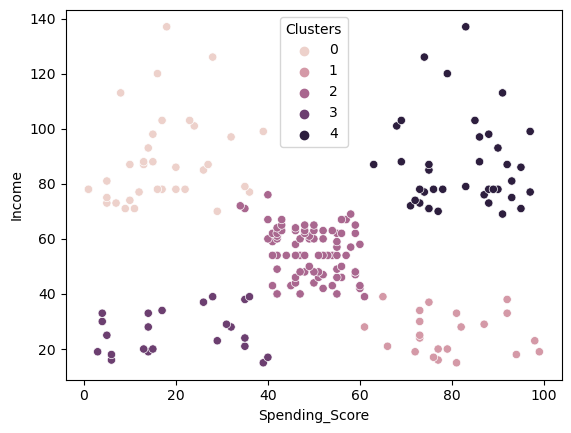

In [18]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

In [19]:
df_Short = df[['Spending_Score','Income']]

In [20]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

G:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37442.247450
6,7,30259.657207
7,8,25044.967764
8,9,21830.041978
9,10,19755.619861


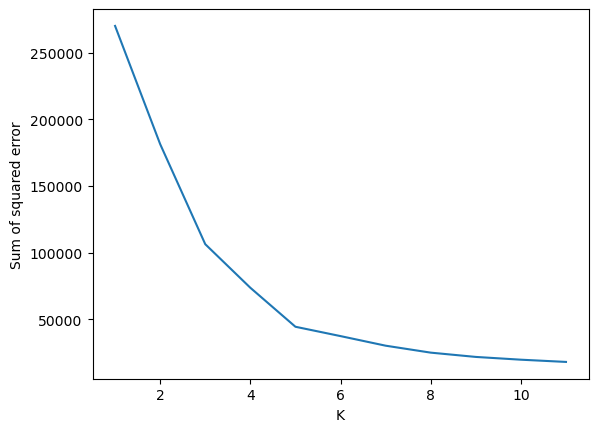

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(K,wss)

# Silhouette Method to Indentify Clusters

In [23]:
import sklearn.metrics as metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.5379675585622219
Silhouette score for k(clusters) = 7 is 0.5367379891273258
Silhouette score for k(clusters) = 8 is 0.4592958445675391
Silhouette score for k(clusters) = 9 is 0.45770857148861777
Silhouette score for k(clusters) = 10 is 0.446735677440187
Silhouette score for k(clusters) = 11 is 0.4472950813160941
Silhouette score for k(clusters) = 12 is 0.4257901147260263


In [24]:
#Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

In [25]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [26]:
#Plot Clusters on Chart¶

In [27]:
df['Clusters'] = kmeans.labels_

<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

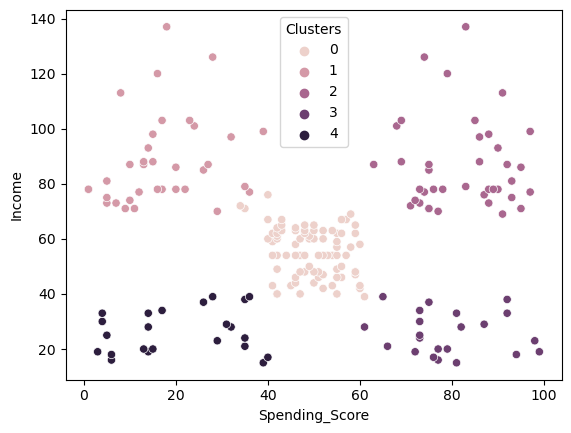

In [28]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

In [30]:
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(df_Short)
# Create k-mean object
cluster = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=100)
# Train model
model = cluster.fit(features_std)

G:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [31]:
#Clustering Using Meanshift

In [32]:
from sklearn.cluster import MeanShift

In [33]:
# Create meanshift object
cluster = MeanShift(n_jobs=-1)
# Train model
model = cluster.fit(features_std)

In [34]:
# View predict class
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [35]:
#Clustering Using Hierarchical Merging

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
cluster = AgglomerativeClustering(n_clusters=5)
# Train model
model = cluster.fit(features_std)

In [38]:
# View predict class
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
#eps stand for  the epsilon means the radius of the circle and min_samples means  the  5 points on the circle

In [41]:
dbscan=DBSCAN(eps=5,min_samples=5)

In [42]:
labels=dbscan.fit_predict(df_Short)

In [43]:
import numpy as np

In [44]:
np.unique(labels)# in output -1 means the noise or outlier

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [48]:
plt.scatter(df_Short[labels==-1,0],df_Short[labels==-1,1],s=10,c='blue')

plt.scatter(df_Short[labels==0,0],df_Short[labels==0,1],s=10,c="red")
plt.scatter(df_Short[labels==1,0],df_Short[labels==1,1],s=10,c="green")
plt.scatter(df_Short[labels==2,0],df_Short[labels==2,1],s=10,c="yellow")
plt.scatter(df_Short[labels==3,0],df_Short[labels==3,1],s=10,c="pink")
plt.scatter(df_Short[labels==4,0],df_Short[labels==4,1],s=10,c="grey")



plt.xlabel("annual income")
plt.ylabel("spending score")

InvalidIndexError: (array([ True, False,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]), 0)

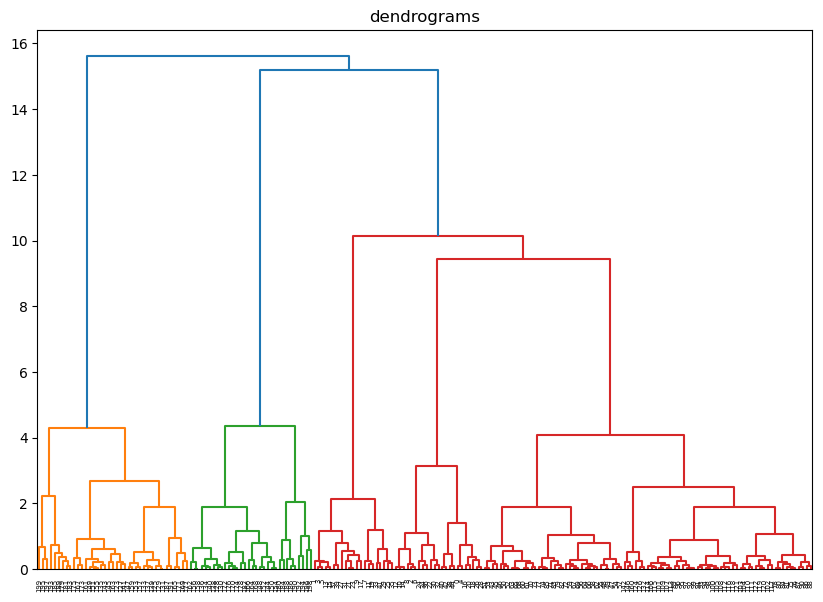

In [50]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("dendrograms")
dend=shc.dendrogram(shc.linkage(features_std,method="ward"))

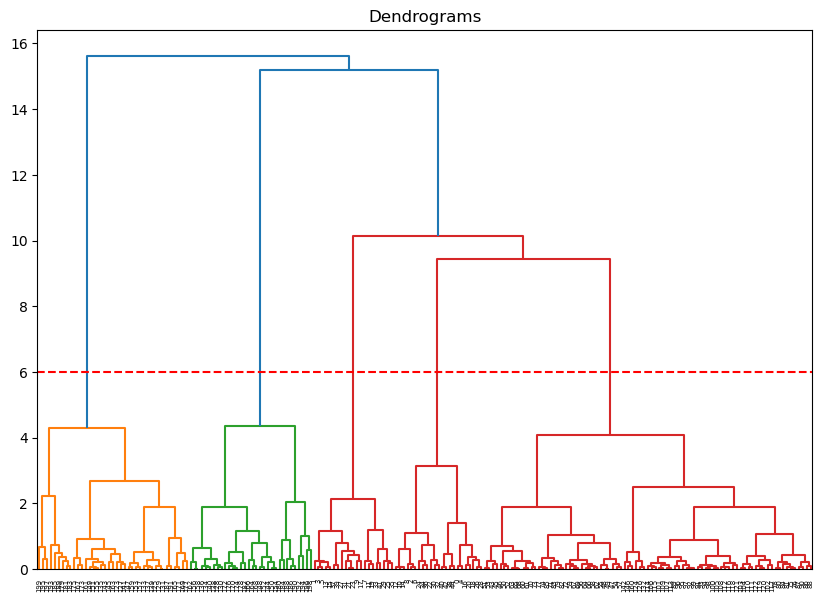

In [51]:
plt.figure(figsize=(10, 7))  

plt.title("Dendrograms")

z = shc.linkage(features_std, method='ward')

dend = shc.dendrogram( z )

plt.axhline(y=6, color='r', linestyle='--')

plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [53]:
cluster.fit_predict(features_std)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [54]:
cluster.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [59]:
#plt.figure(figsize=(10, 7))  

#plt.scatter(features_std['Spending_Score'], features_std['Income'], c=cluster.labels_)

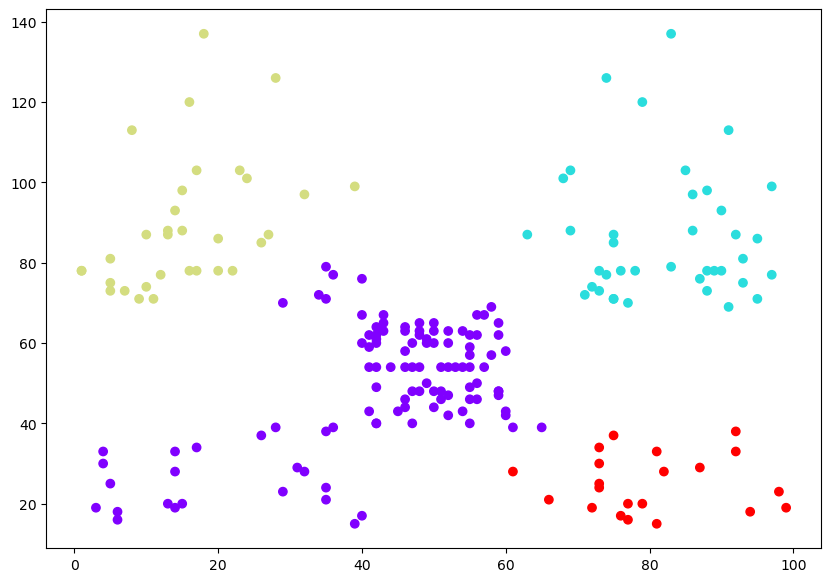

In [60]:
plt.figure(figsize=(10, 7))

plt.scatter(df["Spending_Score"], df["Income"], c=cluster.labels_, cmap='rainbow')

In [61]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [68]:
df["Gender"].value_counts()

0    112
1     88
Name: Gender, dtype: int64

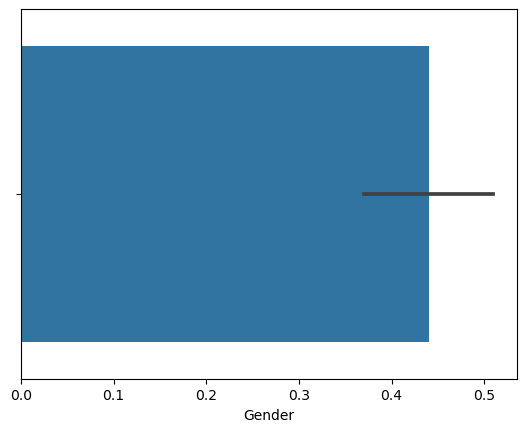

In [74]:
sns.barplot(x="Gender",data=df)
plt.show()                                                                                               

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le= LabelEncoder()

In [77]:
df["Gender"]=le.fit_transform(df["Gender"])

In [78]:
df.head()

,Gender,Age,Income,Spending_Score,Clusters
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


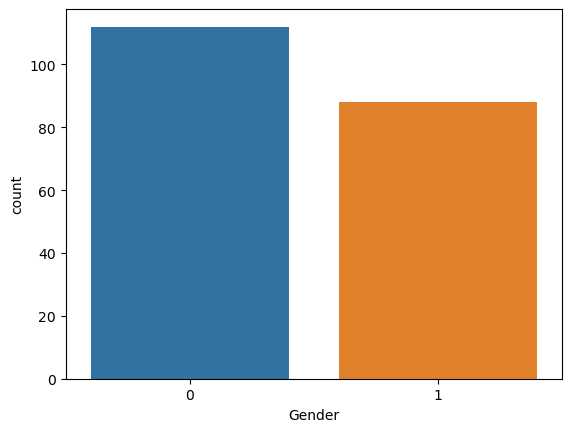

In [81]:
sns.countplot(x="Gender",data=df)
plt.show()

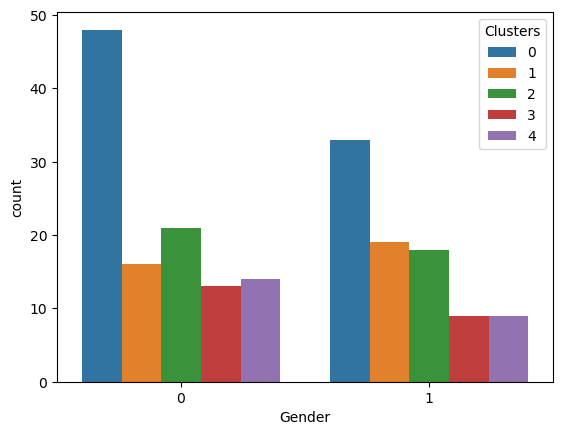

In [83]:
sns.countplot(x="Gender",hue="Clusters",data=df)
plt.show()

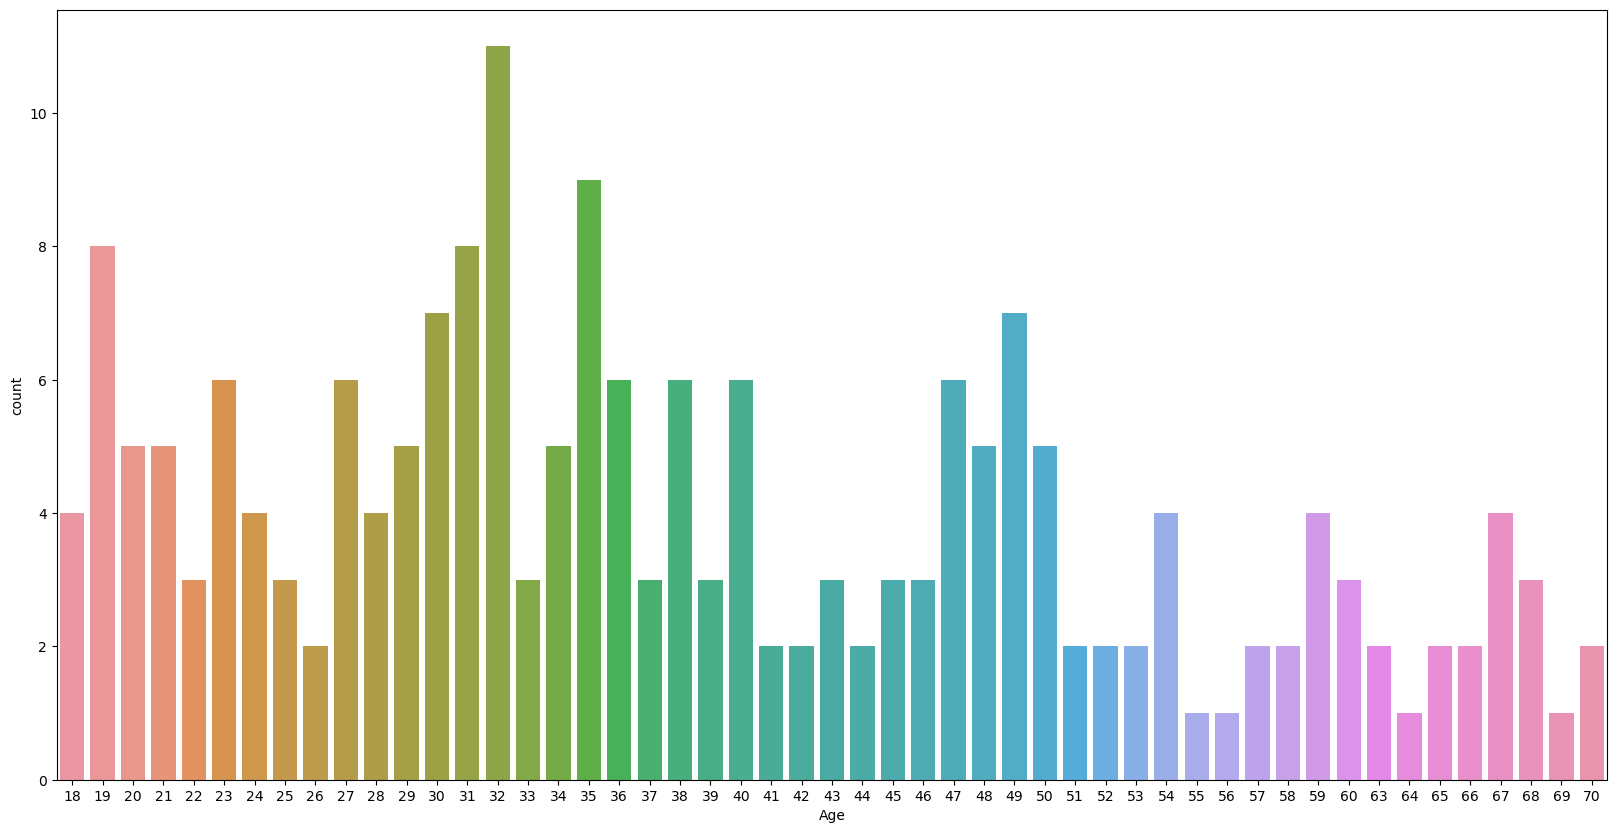

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age",data=df)
plt.show()

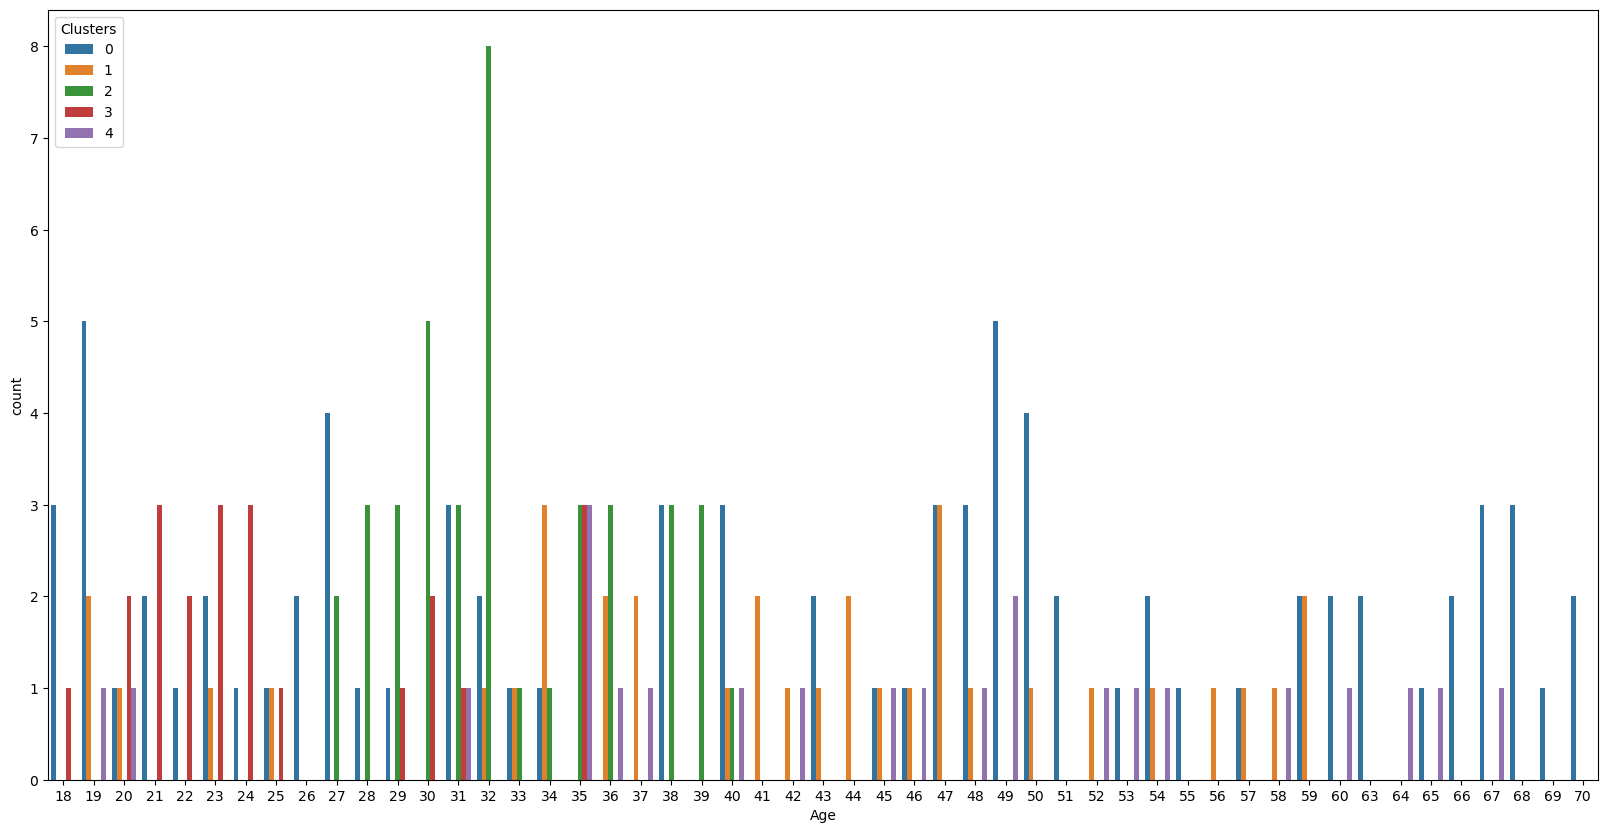

In [87]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age",hue="Clusters",data=df)
plt.show()

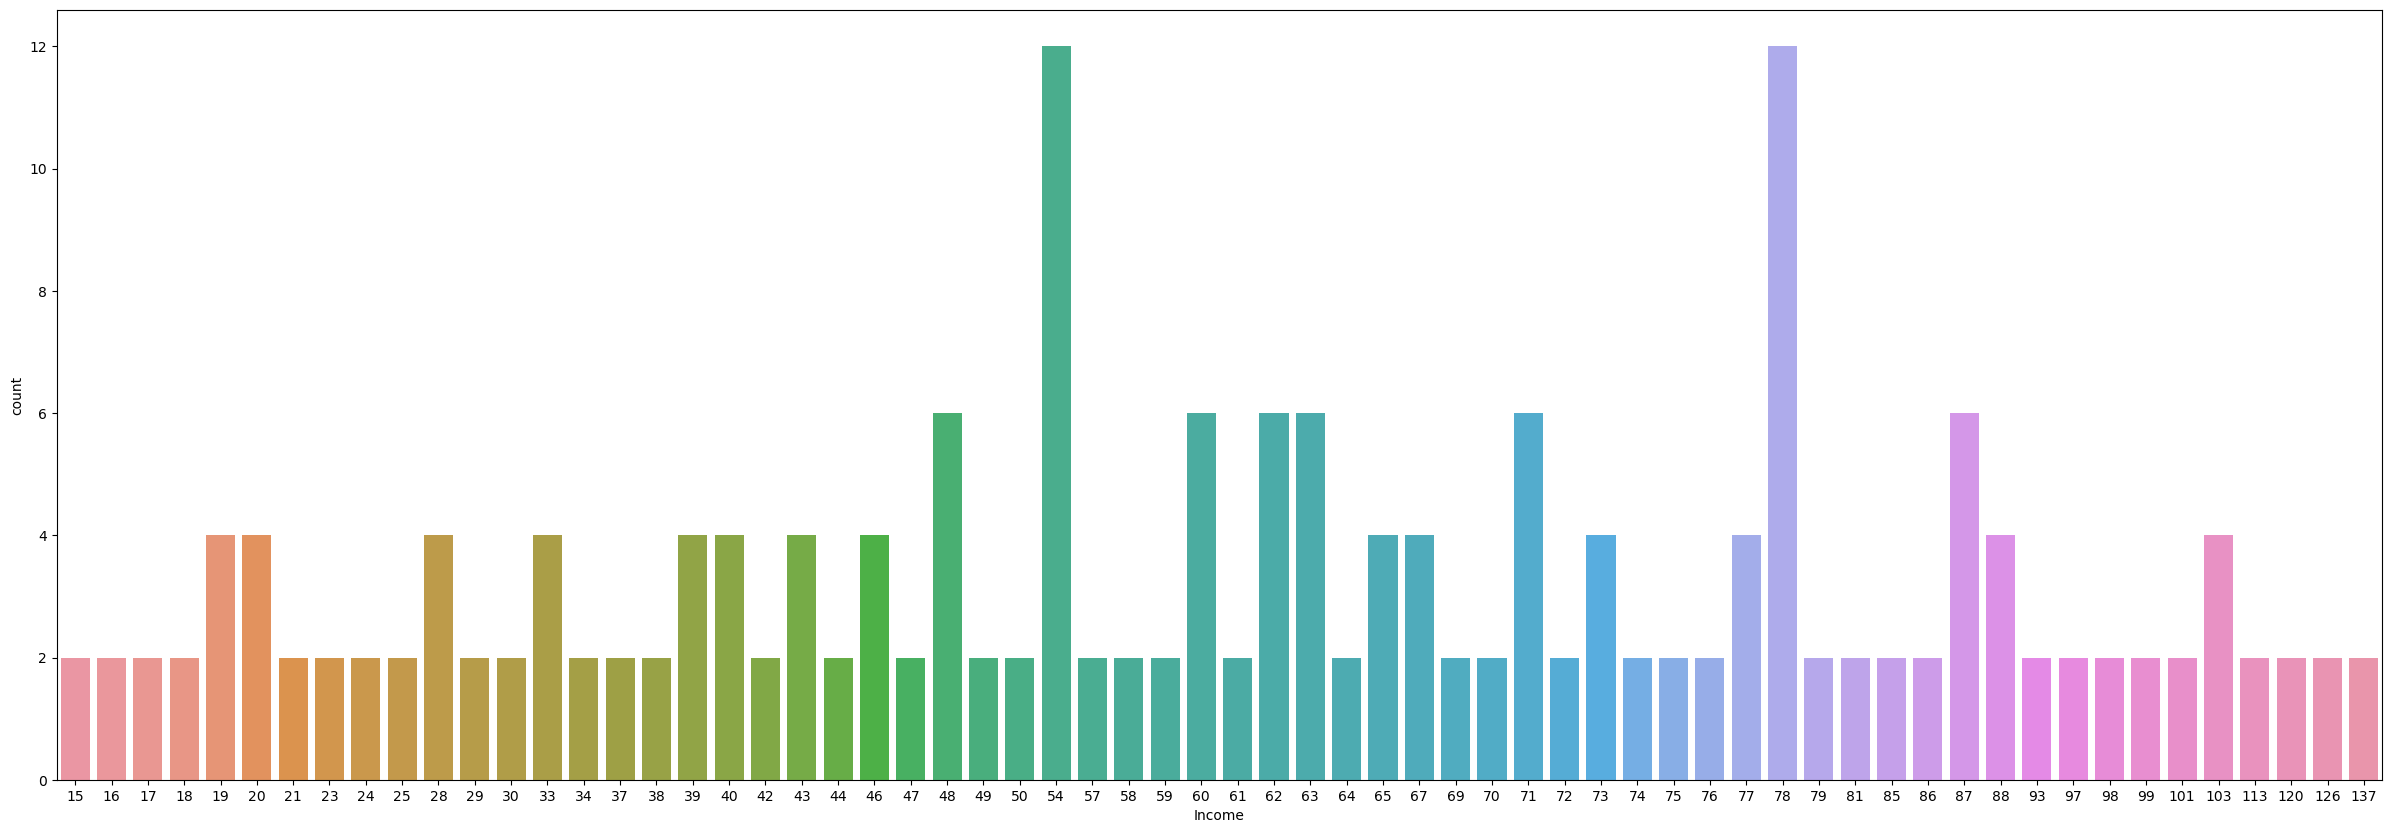

In [89]:
plt.figure(figsize=(30,10))
sns.countplot(x="Income",data=df)
plt.show()

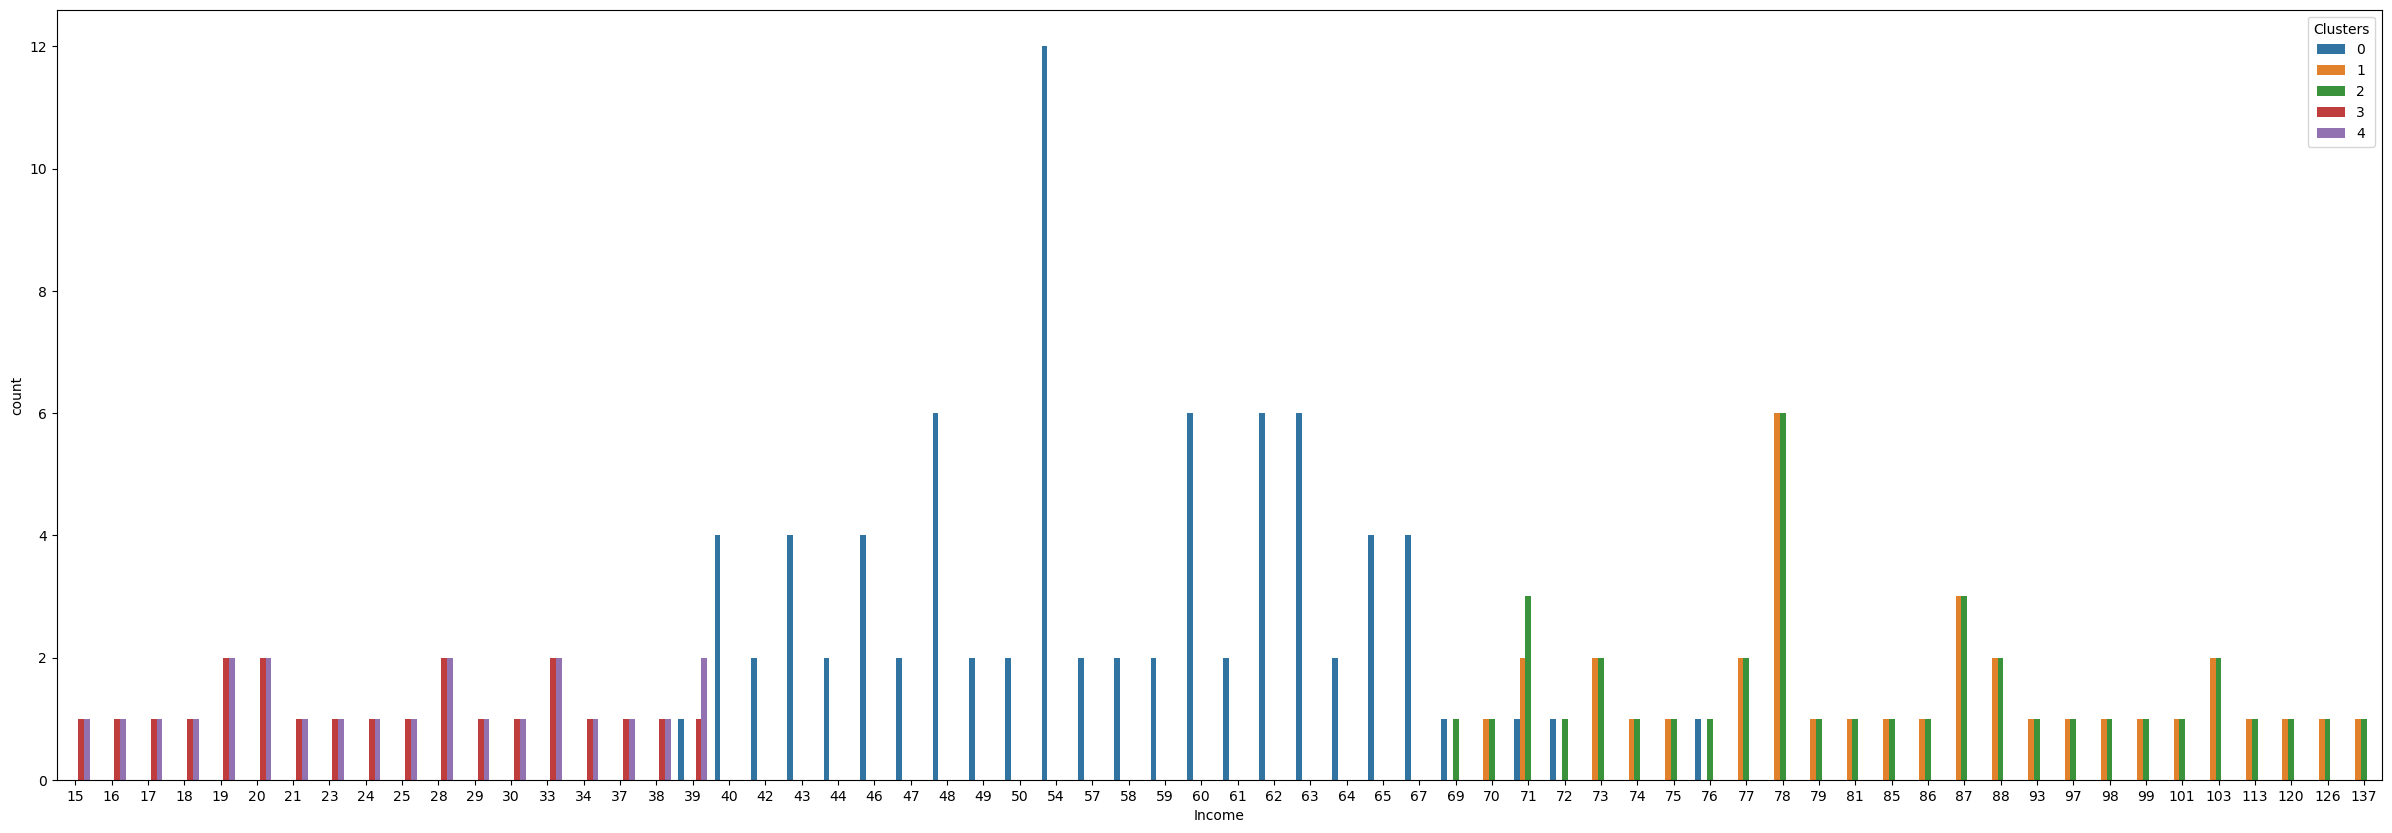

In [90]:
plt.figure(figsize=(30,10))
sns.countplot(x="Income",hue="Clusters",data=df)
plt.show()

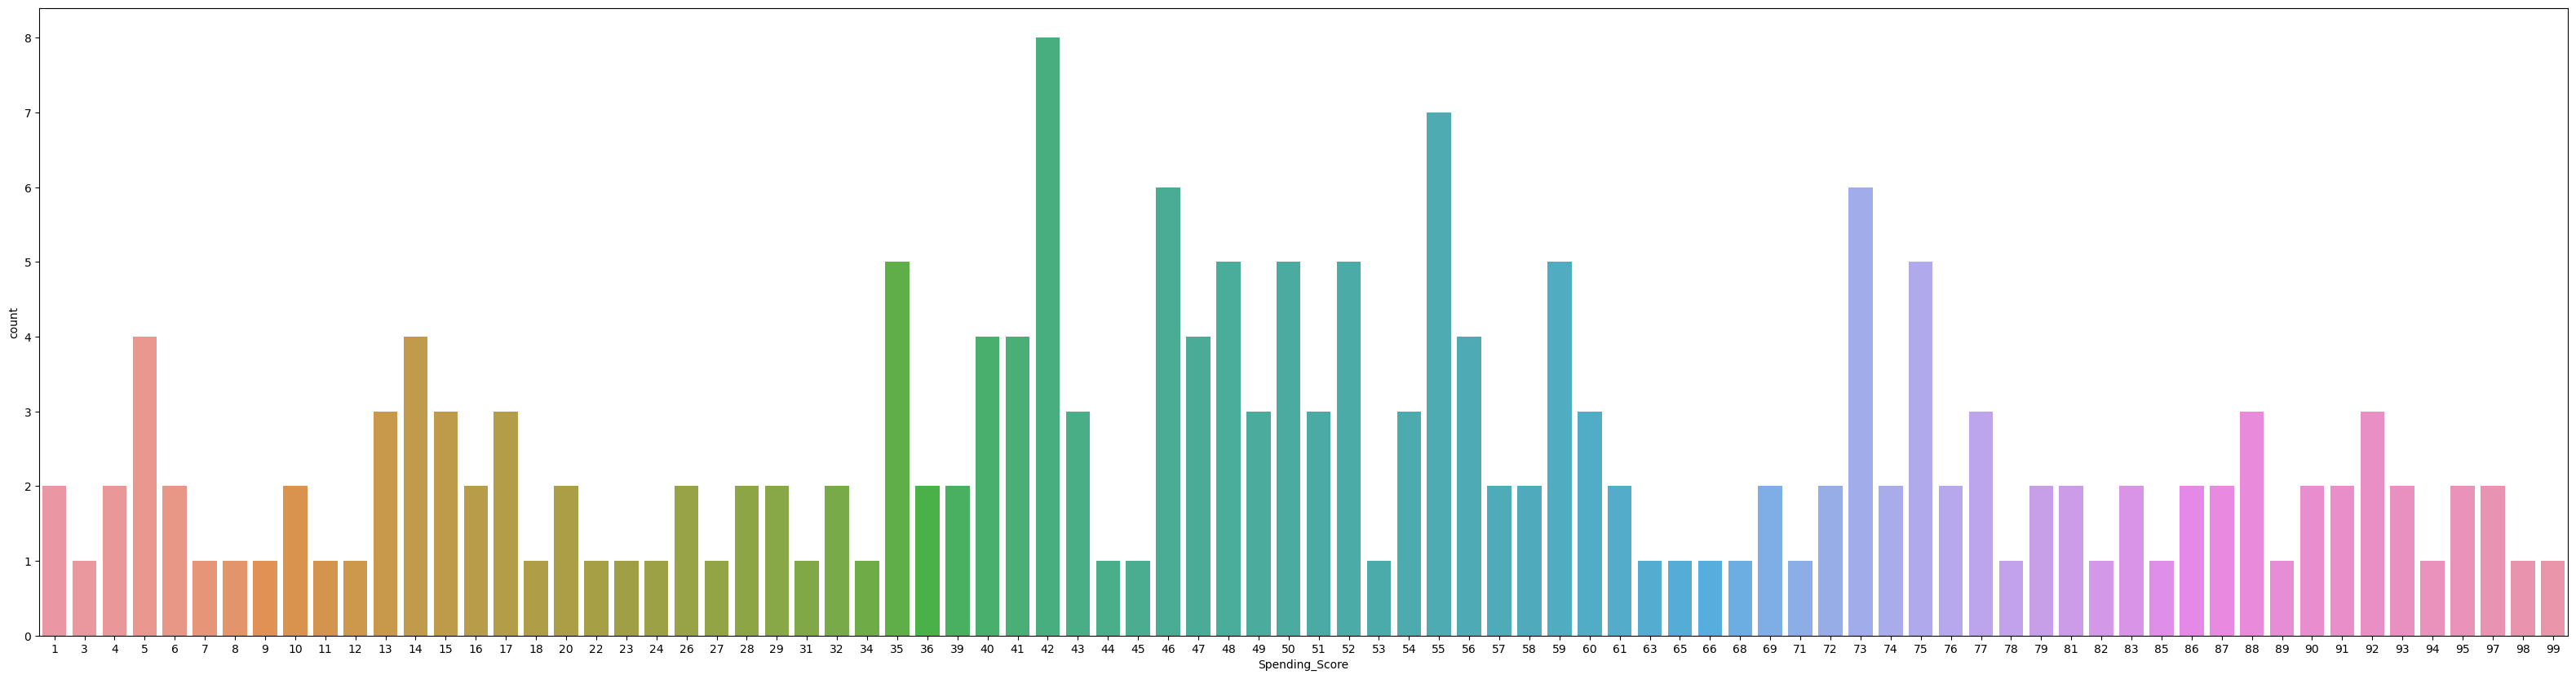

In [92]:
plt.figure(figsize=(40,10))
sns.countplot(x="Spending_Score",data=df)
plt.show()

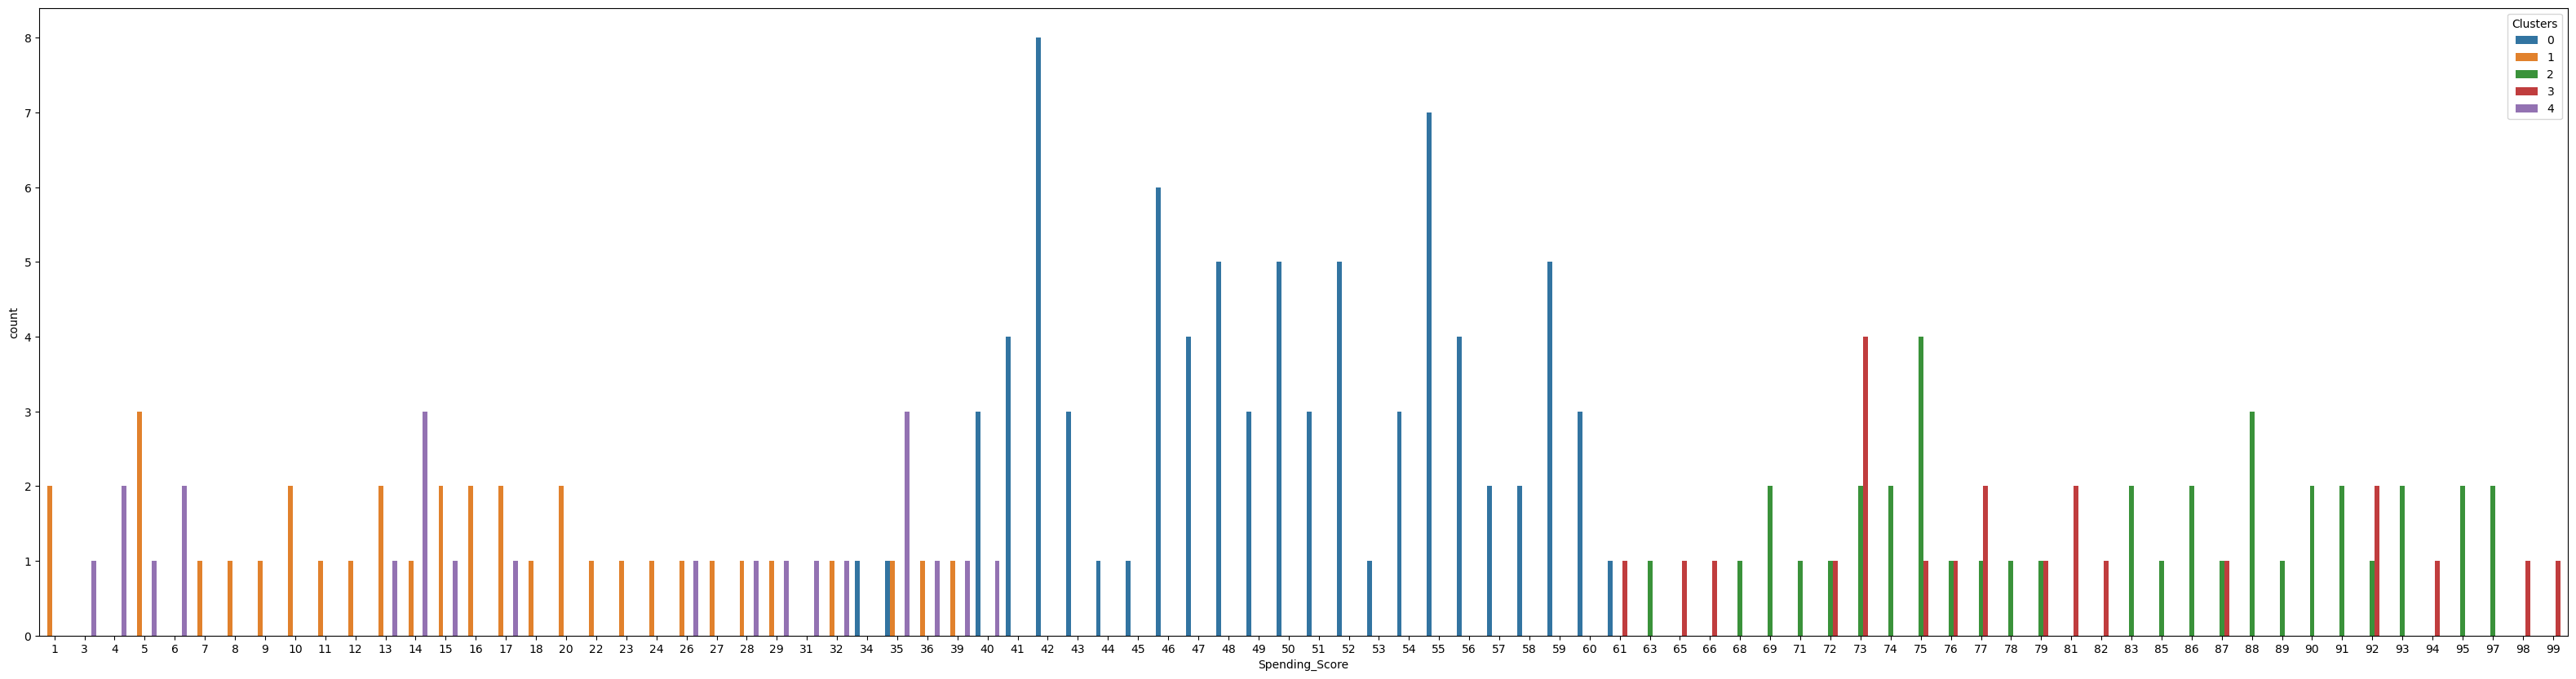

In [93]:
plt.figure(figsize=(40,10))
sns.countplot(x="Spending_Score",hue="Clusters",data=df)
plt.show()

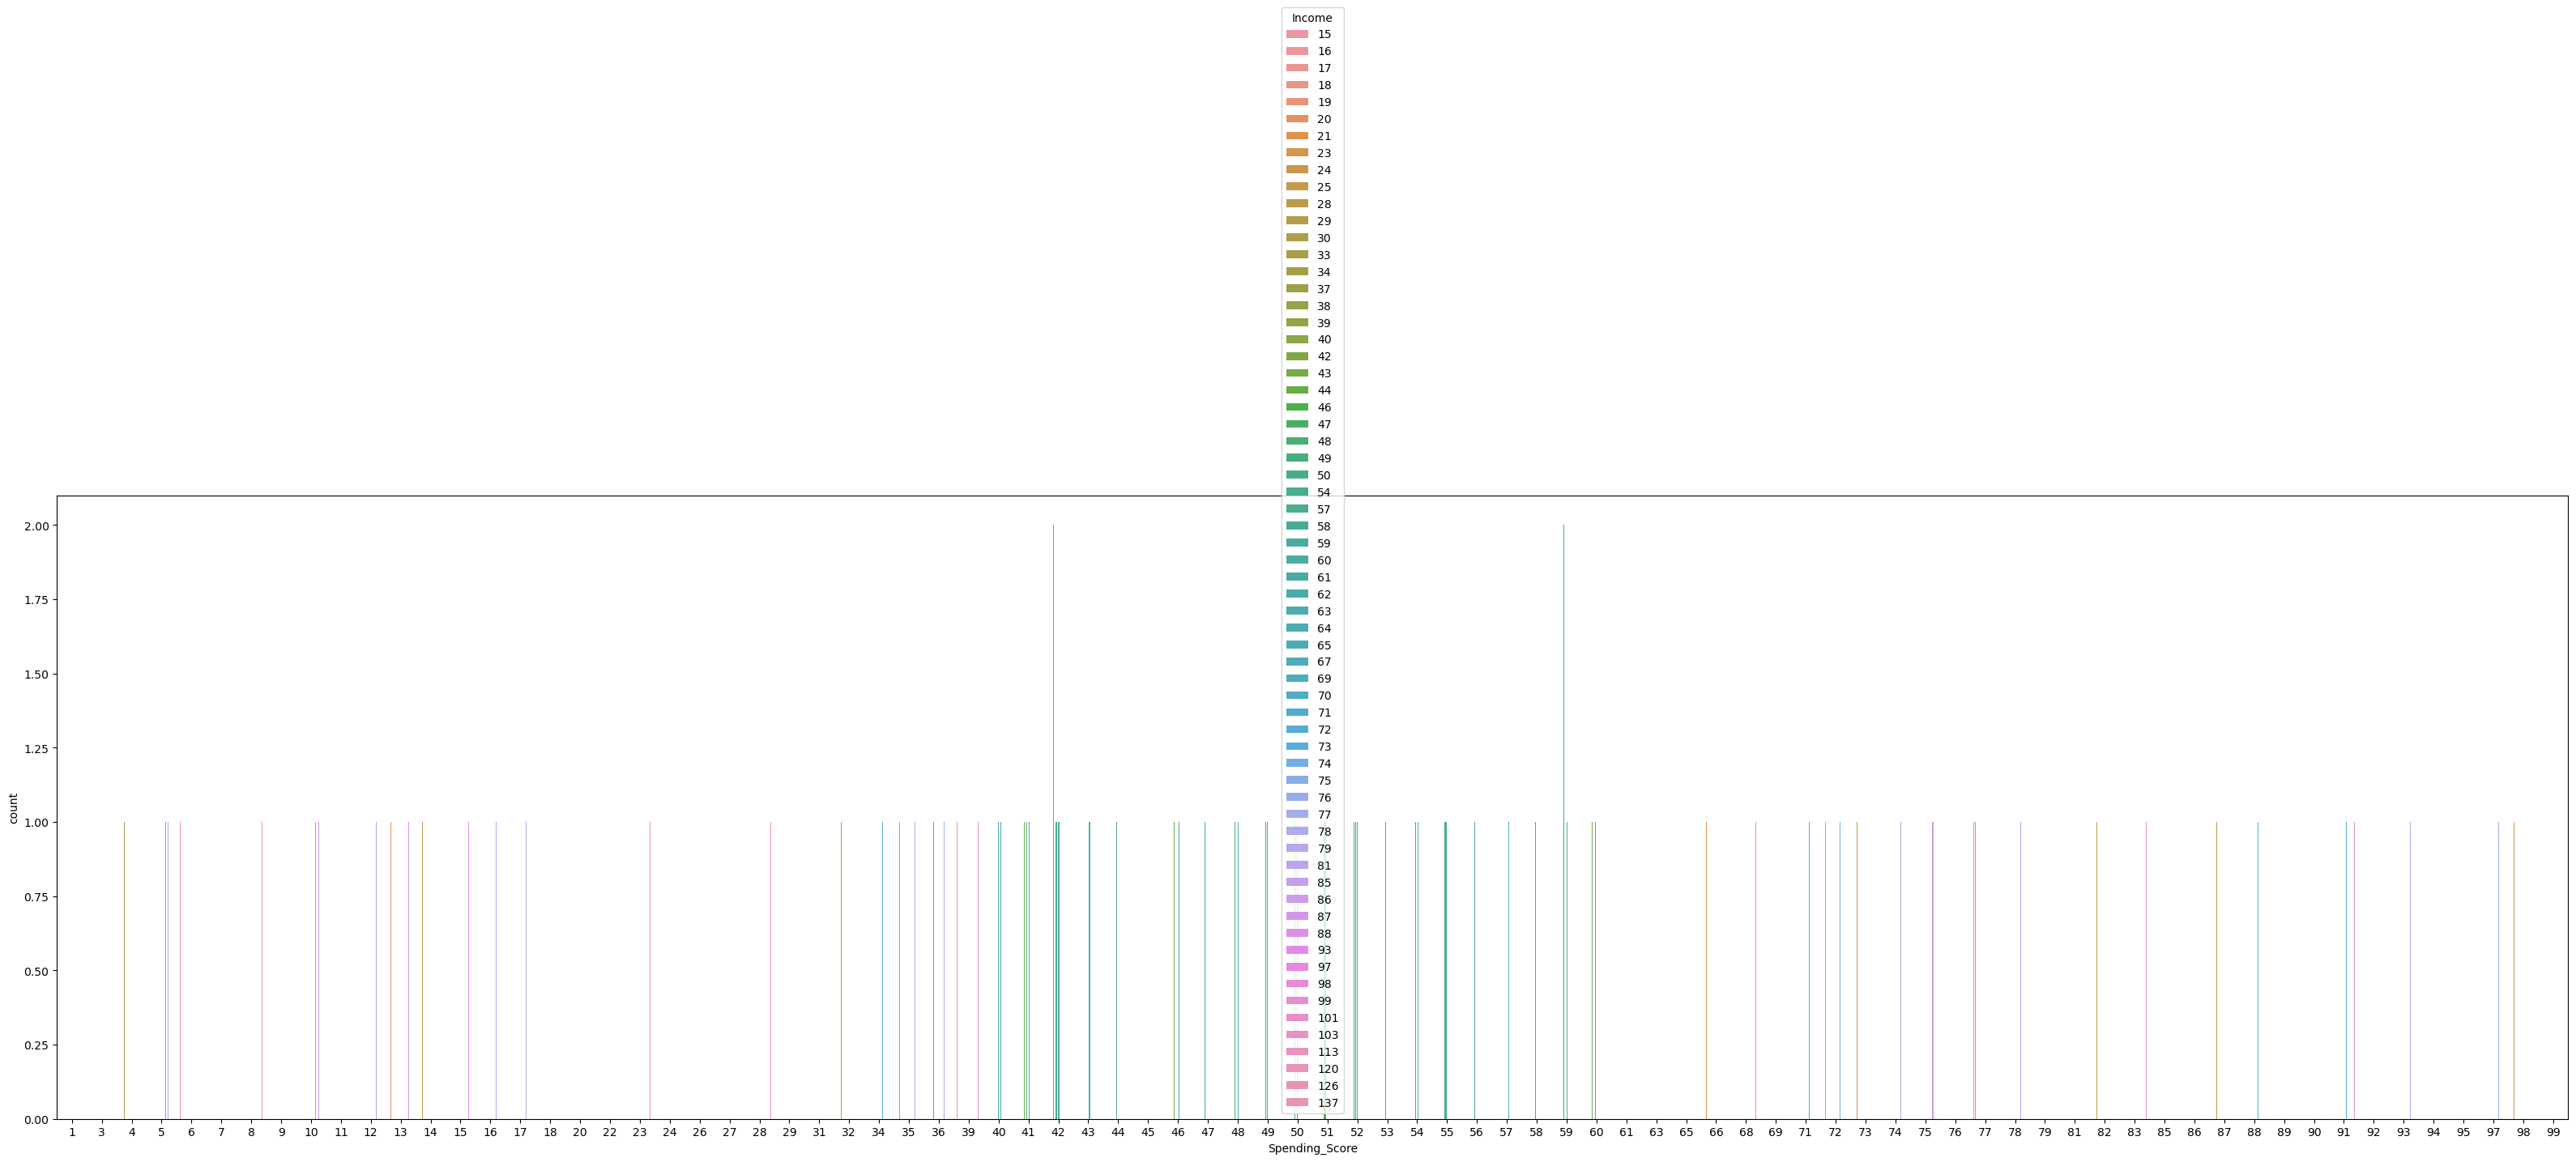

In [96]:
plt.figure(figsize=(40,10))
sns.countplot(x="Spending_Score",hue="Income",data=df)
plt.show()

In [97]:
df

,Gender,Age,Income,Spending_Score,Clusters
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [98]:
x=df.drop(["Clusters"],axis="columns")
y=df["Clusters"]

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.2)

In [102]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [103]:
log_model=LogisticRegression()
guss_model=GaussianNB()
mult_model=MultinomialNB()
knn_model= KNeighborsClassifier()
dt_model= DecisionTreeClassifier()
rf_model=RandomForestClassifier()
gb_model=GradientBoostingClassifier()
ada_bost_model=AdaBoostClassifier()
ext_model=ExtraTreesClassifier()
sv_model=SVC()
xgb_model= XGBClassifier()

In [104]:
from sklearn.feature_selection import VarianceThreshold

In [105]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train)

VarianceThreshold(threshold=0)

In [106]:
### Finding non constant features
sum(var_thres.get_support())

4

In [107]:
# Lets Find non-constant features 
len(x_train.columns[var_thres.get_support()])

4

In [108]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [109]:
for column in constant_columns:
    print(column)

In [110]:
#x_train.drop(constant_columns,axis=1,inplace=True)

In [111]:
x_train.corr()

,Gender,Age,Income,Spending_Score
Gender,1.000000,0.035769,0.087844,-0.021926
Age,0.035769,1.000000,-0.070393,-0.303035
Income,0.087844,-0.070393,1.000000,0.020790
Spending_Score,-0.021926,-0.303035,0.020790,1.000000


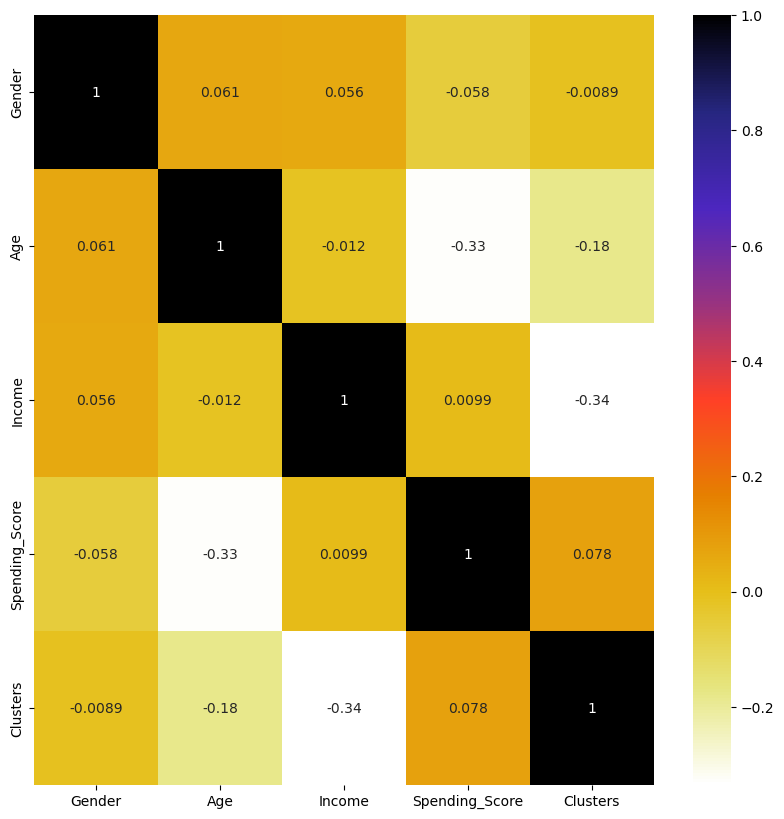

In [113]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [114]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [115]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

0

In [116]:
corr_features

set()

In [117]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [118]:
from sklearn.feature_selection import  mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.        , 0.3485297 , 0.89775994, 0.99893111])

In [119]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Spending_Score    0.998931
Income            0.897760
Age               0.348530
Gender            0.000000
dtype: float64

<AxesSubplot:>

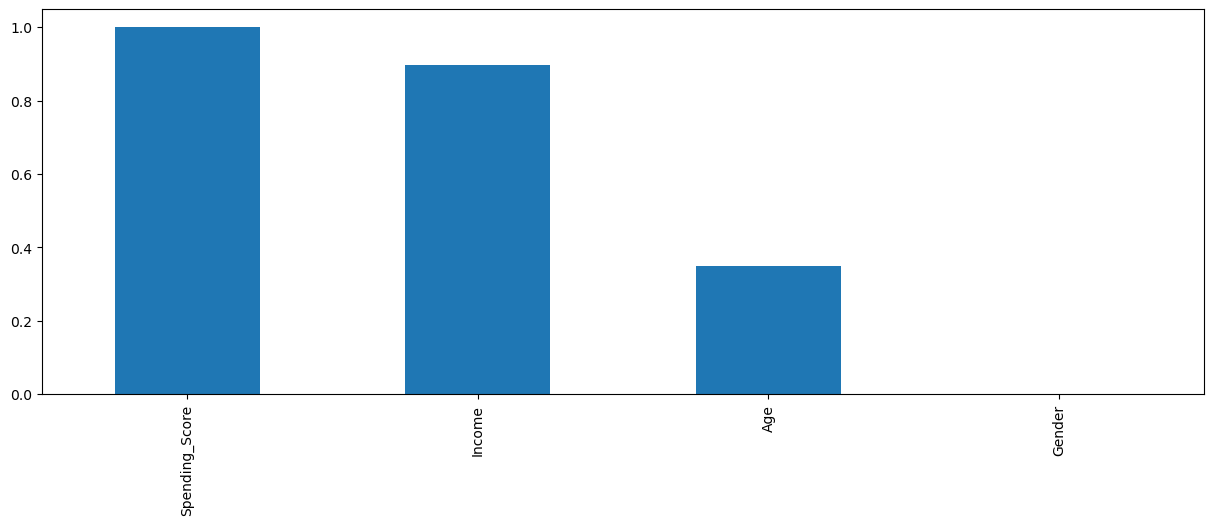

In [120]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [121]:
from sklearn.feature_selection import SelectPercentile

In [122]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=20)
selected_top_columns.fit(x_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_classif at 0x000001D4BC39E4C0>)

In [123]:
selected_top_columns.get_support()

array([False, False, False,  True])

In [125]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest( mutual_info_classif, k=4)
sel_five_cols.fit(x_train, y_train)

SelectKBest(k=4,
            score_func=<function mutual_info_classif at 0x000001D4BC39E4C0>)

In [126]:
x_train.columns[sel_five_cols.get_support()]

Index(['Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')

In [127]:
from sklearn.preprocessing import StandardScaler

In [129]:
# Preprocess the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Select the features using mutual information and SelectKBest
mi = mutual_info_classif(x_train, y_train)
kbest = SelectKBest(k=4)
x_train_selected = kbest.fit_transform(x_train, y_train)
x_test_selected = kbest.transform(x_test)

# Train the SVR model
model = SVC()
model.fit(x_train_selected, y_train)

# Evaluate the model
accuracy = model.score(x_test_selected, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [130]:
x = df.iloc[:, :5]
y = df.iloc[:, -1]

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.2)

In [132]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [133]:
log_model=LogisticRegression()
guss_model=GaussianNB()
mult_model=MultinomialNB()
knn_model= KNeighborsClassifier()
dt_model= DecisionTreeClassifier()
rf_model=RandomForestClassifier()
gb_model=GradientBoostingClassifier()
ada_bost_model=AdaBoostClassifier()
ext_model=ExtraTreesClassifier()
sv_model=SVC()
xgb_model= XGBClassifier()

In [134]:
get_score(log_model,x_train,x_test,y_train,y_test)

G:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95

In [135]:
get_score(guss_model,x_train,x_test,y_train,y_test)

1.0

In [136]:
get_score(knn_model,x_train,x_test,y_train,y_test)

G:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.95

In [137]:
get_score(dt_model,x_train,x_test,y_train,y_test)

1.0

In [138]:
get_score(rf_model,x_train,x_test,y_train,y_test)

1.0

In [139]:
get_score(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

0.975

In [140]:
get_score(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

0.55

In [141]:
get_score(ExtraTreesClassifier(),x_train,x_test,y_train,y_test)

1.0

In [142]:
get_score(SVC(),x_train,x_test,y_train,y_test)

0.975

In [143]:
get_score(XGBClassifier(),x_train,x_test,y_train,y_test)

0.975

In [144]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [145]:
from sklearn.metrics import confusion_matrix
y_pred = knn_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

G:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[13,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 1,  0,  0,  8,  0],
       [ 1,  0,  0,  0,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

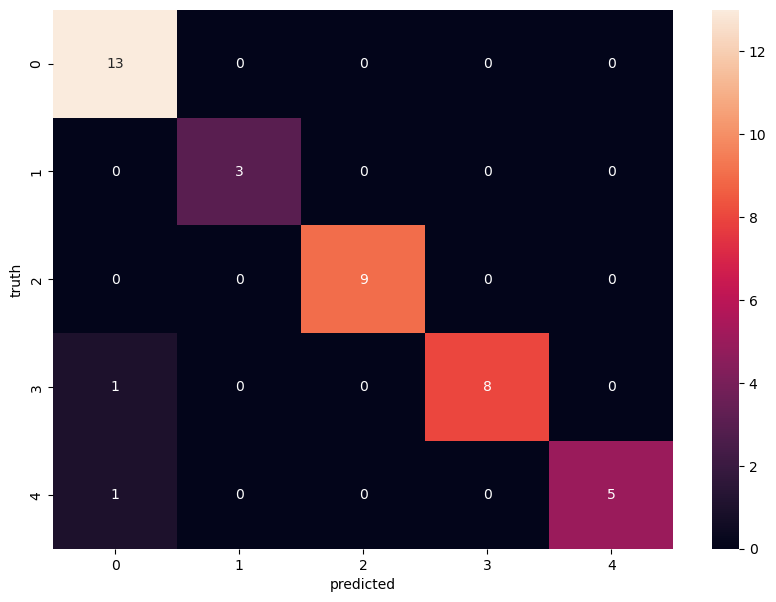

In [146]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [22]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

KeyError: 'Income($)'

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

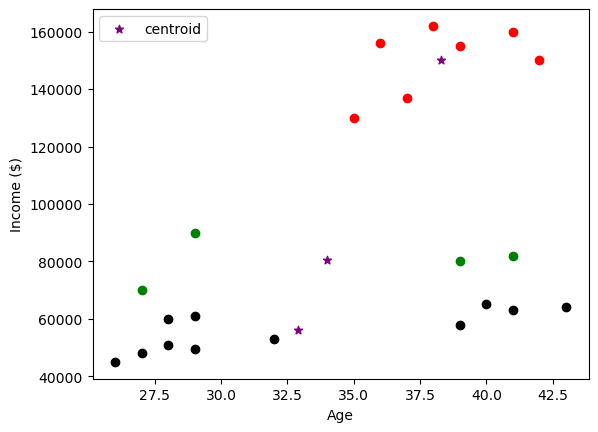

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [9]:
scaler = MinMaxScaler()

#scaler.fit(df[['Income($)']])
df['Income($)'] =scaler.fit_transform(df[['Income($)']])

#scaler.fit(df[['Age']])
df['Age'] = scaler.fit_transform(df[['Age']])

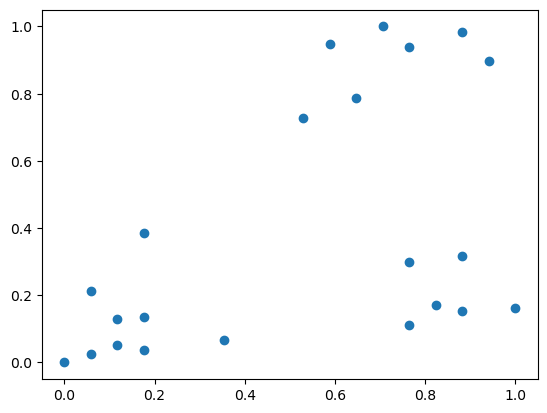

In [10]:
plt.scatter(df.Age,df['Income($)'])

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [13]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

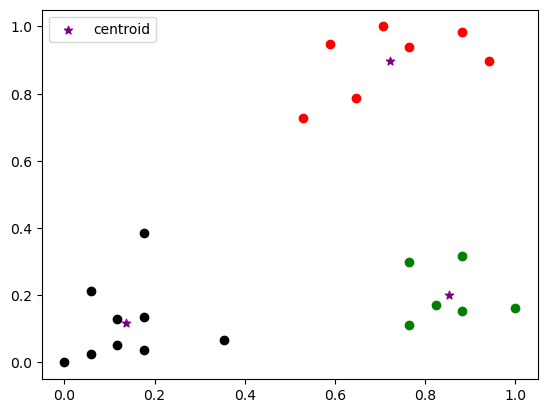

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

G:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


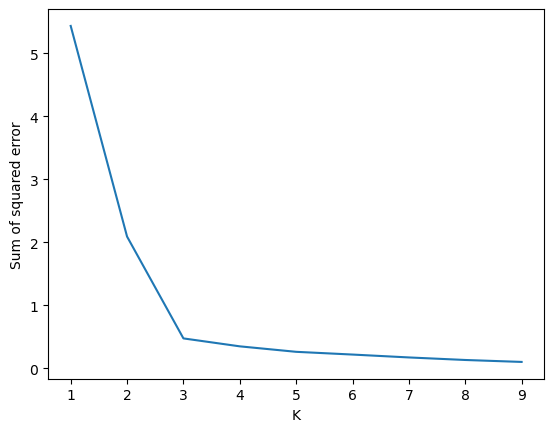

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)